In [1]:
import gym
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = gym.make('MountainCar-v0')
env.reset()
VALID_ACTIONS = list(range(env.action_space.n))

print VALID_ACTIONS

[2017-10-19 10:28:14,539] Making new env: MountainCar-v0


[0, 1, 2]


0.518968784771
100000000000000000000
0.589819472227
100000000000000000000
0.595133076717
100000000000000000000
0.572736071444
100000000000000000000
0.527202999493
100000000000000000000
0.541674395612
100000000000000000000
0.508525147761
100000000000000000000
[[ 1.38732071 -0.06531716]
 [-1.27188834  0.09231147]
 [ 3.05675507  0.01853286]
 [-0.09936378 -1.04063712]
 [ 0.07157478  1.00129399]]
[0.51896878477110508, 0.58981947222667297, 0.59513307671664439, 0.57273607144380356, 0.52720299949314109, 0.541674395611769, 0.50852514776132385]


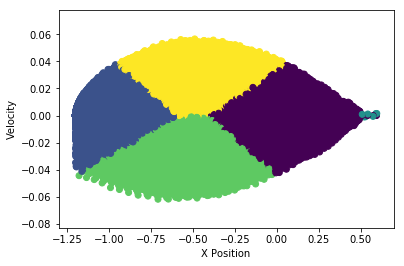

In [6]:
data = []
goal_x_positions = []

for episode in xrange(100):
    state = env.reset()
    state_copy = state[:]
    state_copy = np.append(state_copy, -1)
    data.append(state_copy)
    done = False
    step_count = 0
    while not done:
        step_count +=1
        action = random.randint(0, len(VALID_ACTIONS) - 1)
        next_state, reward, done, _ = env.step(action)
        if reward >= 1:
            reward = 100000000000000000000
        state = next_state
        state_copy = state[:]
        state_copy = np.append(state_copy, reward)
        data.append(state_copy)
        if done and step_count < 200:
            goal_x_positions.append(state[0])
            print state[0]
            print reward
        
data = np.array(data)
x_pos_normalized = (data[:, 0] - np.mean(data[:, 0])) / np.std(data[:, 0])
velocity_normalized = (data[:, 1] - np.mean(data[:, 1])) / np.std(data[:, 1])
reward_normalized = (data[:, 2] - np.mean(data[:, 2])) / np.std(data[:, 2])
data_normalized = zip(x_pos_normalized, velocity_normalized, reward_normalized)
# data_normalized = zip(x_pos_normalized, velocity_normalized)

estimator = KMeans(n_clusters=5)
estimator.fit(data_normalized)

labels = estimator.labels_
print estimator.cluster_centers_[:,0:2]

print goal_x_positions

plt.scatter(data[:,0], data[:,1], c=labels.astype(np.float))
plt.xlabel('X Position')
plt.ylabel('Velocity')
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(data, labels) 
neigh.predict([[0, 0, 0]])



array([0], dtype=int32)

In [ ]:
'''
Cluster by x-position and velocity separately.
'''

data = []
goal_x_positions = []

for episode in xrange(100):
    state = env.reset()
    state_copy = state[:]
    state_copy = np.append(state_copy, -1)
    data.append(state_copy)
    done = False
    step_count = 0
    while not done:
        step_count +=1
        action = random.randint(0, len(VALID_ACTIONS) - 1)
        next_state, reward, done, _ = env.step(action)
        if reward >= 1:
            reward = 100000000000000000000
        state = next_state
        state_copy = state[:]
        state_copy = np.append(state_copy, reward)
        data.append(state_copy)
        if done and step_count < 200:
            goal_x_positions.append(state[0])
            print state[0]
            print reward
        
data = np.array(data)
x_pos_normalized = (data[:, 0] - np.mean(data[:, 0])) / np.std(data[:, 0])
velocity_normalized = (data[:, 1] - np.mean(data[:, 1])) / np.std(data[:, 1])
reward_normalized = (data[:, 2] - np.mean(data[:, 2])) / np.std(data[:, 2])
data_normalized = zip(x_pos_normalized, velocity_normalized, reward_normalized)
# data_normalized = zip(x_pos_normalized, velocity_normalized)

estimator_x = KMeans(n_clusters=3)
estimator_v = KMeans(n_clusters=3)

estimator_x.fit(x_pos_normalized)
estimator_v.fit(velocity_normalized)

labels_x = estimator_x.labels_
labels_v = estimator_v.labels_

plt.figure()
plt.hlines(1,1,20)  # Draw a horizontal line
plt.eventplot(data[:, 0], orientation='horizontal', colors=labels_x)
plt.axis('off')
plt.show()

# plt.scatter(data[:,0], data[:,1], c=labels.astype(np.float))
# plt.xlabel('X Position')
# plt.ylabel('Velocity')
# plt.show()